In [1]:
# libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import numpy as np

In [2]:
# load the dataset
data = pd.read_csv("/Users/ravi/Documents/sgs/sgs_dataset.csv")
data.head()

,temperature,humidity,light,moisture,health
0,27,60,10,70,excellent
1,26,69,9,61,excellent
2,23,70,8,67,excellent
3,26,66,9,70,excellent
4,24,68,10,68,excellent


In [3]:
# encode the target variable and save the corresponding labels
data["health"], LABELS = pd.factorize(data["health"])
print(LABELS)

Index(['excellent', 'good', 'fair', 'poor', 'critical'], dtype='object')


In [4]:
# separate features and target variable
X = data[["temperature", "humidity", "light", "moisture"]]
y = data["health"]
print(X.shape, y.shape)

(1000, 4) (1000,)


In [5]:
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# ann model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],))),
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 2565 (10.02 KB)
Trainable params: 2565 (10.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 0s 6ms/step - loss: 1.5009 - accuracy: 0.2891 - val_loss: 1.4700 - val_accuracy: 0.2937
Epoch 2/50
20/20 [==============================] - 0s 1ms/step - loss: 1.3369 - accuracy: 0.4047 - val_loss: 1.3518 - val_accuracy: 0.4000
Epoch 3/50
20/20 [==============================] - 0s 1ms/step - loss: 1.2015 - accuracy: 0.5359 - val_loss: 1.2227 - val_accuracy: 0.5375
Epoch 4/50
20/20 [==============================] - 0s 1ms/step - loss: 1.0704 - accuracy: 0.6672 - val_loss: 1.0865 - val_accuracy: 0.6250
Epoch 5/50
20/20 [==============================] - 0s 1ms/step - loss: 0.9342 - accuracy: 0.6906 - val_loss: 0.9448 - val_accuracy: 0.6062
Epoch 6/50
20/20 [==============================] - 0s 1ms/step - loss: 0.7978 - accuracy: 0.7219 - val_loss: 0.8091 - val_accuracy: 0.6562
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.7812 - val_loss: 0.7050 - val_accuracy: 0.7375
Epoch 8/50
20/20 [==

In [10]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 660us/step - loss: 0.2446 - accuracy: 0.9050
Test Accuracy: 0.9049999713897705


In [11]:
# prediction function
def prediction(data):
    # normalization
    data = scaler.transform(data)
    # predict the plant health using the trained model
    prediction = model.predict(data)
    print(prediction)
    predicted_indx = np.argmax(prediction)
    predicted_health = LABELS[predicted_indx]
    print("predicted health:", predicted_health)

In [12]:
prediction(np.array([[35.17487833718538, 93.85936114072581, 13.171837343260986, 97.17757624341523]]))

1/1 [==============================] - 0s 36ms/step
[[2.5501559e-04 1.2601856e-05 3.2864655e-08 7.8601383e-13 9.9973232e-01]]
predicted health: critical


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


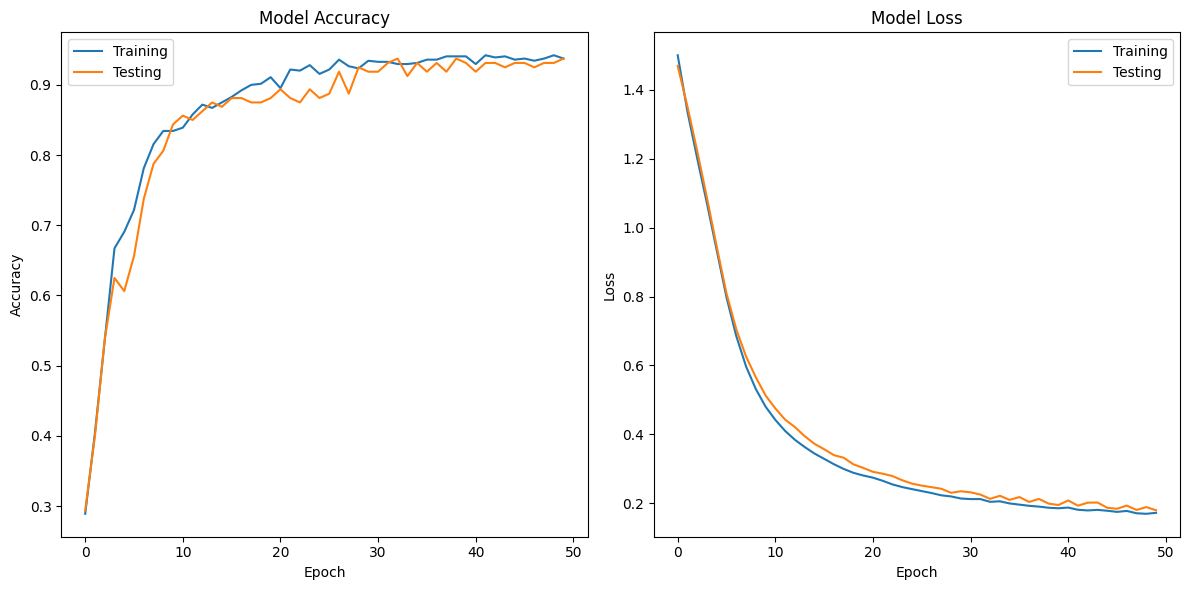

In [13]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper right')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix

# Assuming `model` is your trained model and `X_test`, `y_test` are your test data and labels

# Get the predicted labels
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

7/7 [==============================] - 0s 563us/step
Confusion Matrix:
[[33  0  0  0  0]
 [ 4 40  4  0  0]
 [ 0  3 32  2  0]
 [ 0  0  6 32  0]
 [ 0  0  0  0 44]]
